In [1]:
import numpy as np
import time
from PySDM import Formulae
from PySDM.physics.constants import si
from PySDM.backends import CPU
from PySDM_examples.Luettmer_homogeneous_freezing.simulation import Simulation
from PySDM_examples.Luettmer_homogeneous_freezing.settings import Settings
from PySDM_examples.Luettmer_homogeneous_freezing import plot
from importlib import reload
from matplotlib import pyplot


In [6]:
"""  basic setup for homogeneous freezing of pure-liquid droplets """
"""
Ensemble for:
1. n_sd
2. w
3. n_c
Questions:
- where to store backend
"""

n_sd = 100
number_concentration_droplets = 850 / si.cm**3
mean_radius_dry_aerosol= 15 * si.nanometer
updraft = 1 * si.meter / si.second
initial_temperature =  -25. + 273.
time_step = 0.1 * si.second

# to make it work with the PLOT flag in the smoke test
from open_atmos_jupyter_utils import show_plot
pyplot.plot(np.sin(np.linspace(0, np.pi)))
show_plot()

common = {  "n_sd": n_sd,
    "w_updraft": updraft,
    "T0":  initial_temperature,
    "dt": time_step,
    "N_dv_droplet_distribution": number_concentration_droplets,
    "r_mean_droplet_distribution": mean_radius_dry_aerosol,
    "type_droplet_distribution": "monodisperse",
    "RH_0":0.995,
    "condensation_enable": True,
    "deposition_enable": False,
            }

backends = {
   "threshold": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Null",
        seed=time.time_ns(),
    )),
   "Koop_Correction": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop_Correction",
        seed=time.time_ns(),
    )),
    "KoopMurray2016": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="KoopMurray2016",
        seed=time.time_ns(),
    )),
    "Koop2000": CPU(formulae = Formulae(
        particle_shape_and_density="MixedPhaseSpheres",
        homogeneous_ice_nucleation_rate="Koop2000",
        seed=time.time_ns(),
    )),
}
hom_freezing_types = backends.keys()

simulations = []



for hom_freezing_type in backends.keys():
    setting_dict = {
        **common,
        "backend": backends[hom_freezing_type],
        "hom_freezing": hom_freezing_type,
        }
    if hom_freezing_type == "threshold":
        number_of_ensemble_runs = 1
    else:
        number_of_ensemble_runs = 5
    simulation = { "settings": setting_dict,
                   "number_of_ensemble_runs": number_of_ensemble_runs,
                   "ensemble_member_outputs": [],
                   }
    simulations.append( simulation )

In [9]:
for simulation in simulations:
    for n in range(simulation["number_of_ensemble_runs"]):
        setting = Settings(**simulation["settings"])
        setting.formulae.seed += 1
        model = Simulation(setting)
        simulation["ensemble_member_outputs"].append( model.run() )

Setting up simulation with threshold
1752234237862287545
Starting simulation...
all particles frozen
Setting up simulation with Koop_Correction
1752234262844130233
Starting simulation...
all particles frozen
Setting up simulation with Koop_Correction
1752234288885373280
Starting simulation...
all particles frozen
Setting up simulation with Koop_Correction
1752234299138772465
Starting simulation...
all particles frozen
Setting up simulation with Koop_Correction
1752234309184848705
Starting simulation...
all particles frozen
Setting up simulation with Koop_Correction
1752234320424160522
Starting simulation...
all particles frozen
Setting up simulation with KoopMurray2016
1752234339527919590
Starting simulation...
all particles frozen
Setting up simulation with KoopMurray2016
1752234390016397119
Starting simulation...
all particles frozen
Setting up simulation with KoopMurray2016
1752234400999985312
Starting simulation...
all particles frozen
Setting up simulation with KoopMurray2016
1752

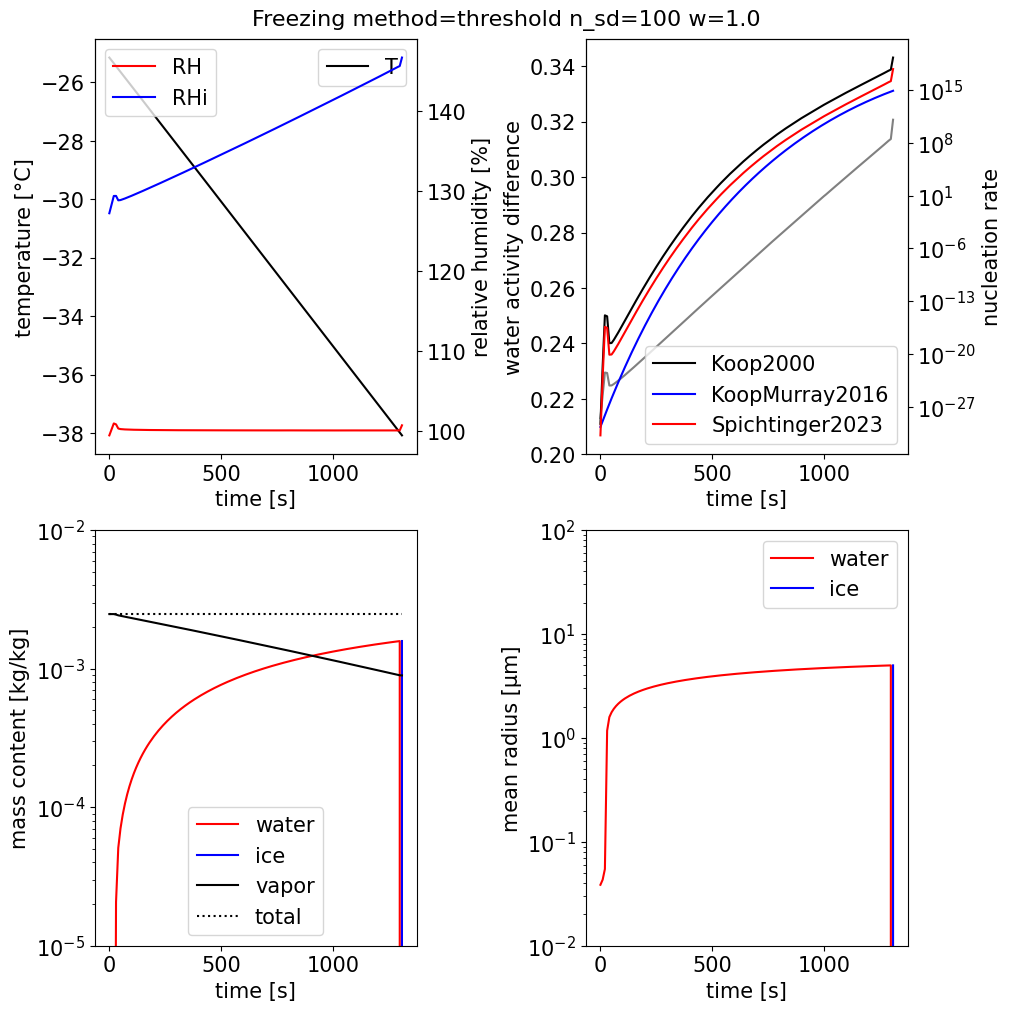

In [10]:
plot.plot_thermodynamics_and_bulk(simulations[0])

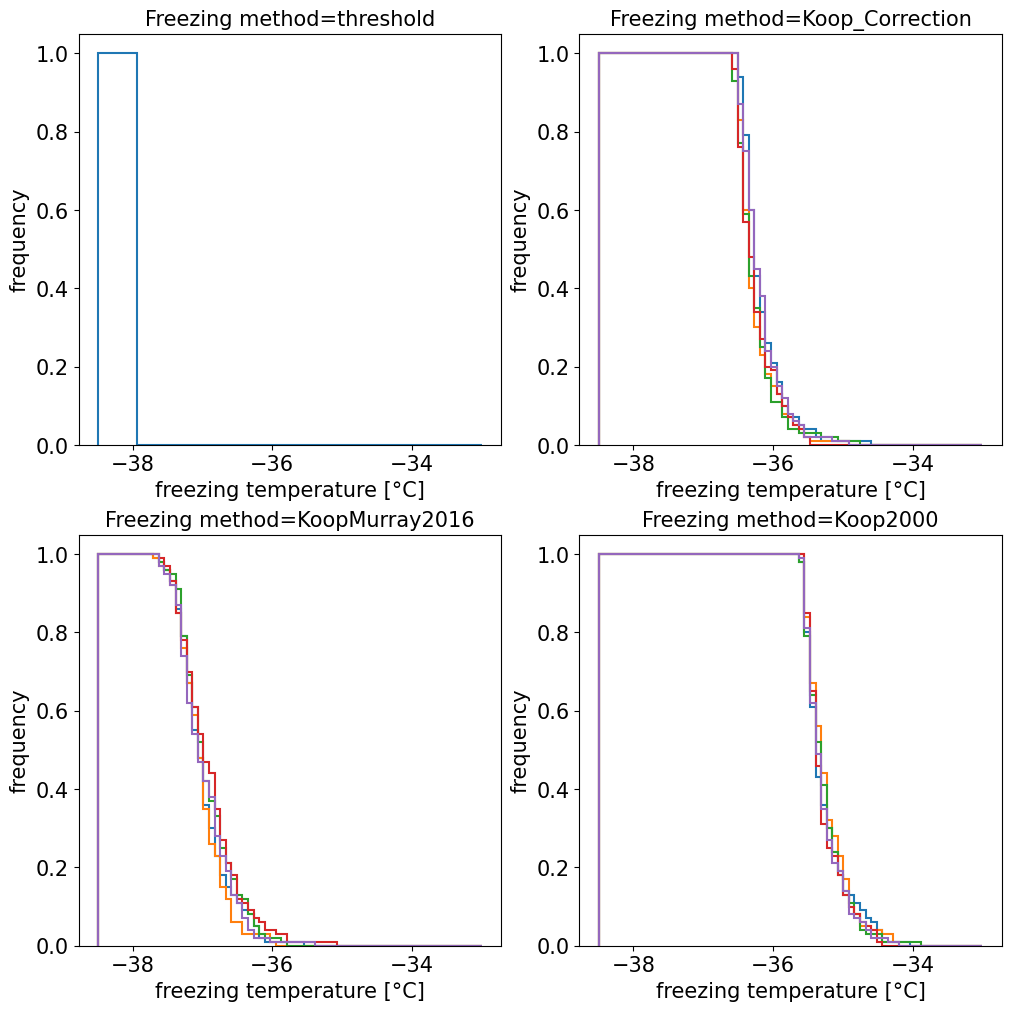

In [13]:
fig, axs = pyplot.subplots(2, 2, figsize=(10, 10), constrained_layout=True)
axs = axs.ravel()

for i, simulation in enumerate(simulations):
    axs[i] = plot.plot_freezing_temperatures(axs[i], simulation)
